#### Imports

In [38]:
import tensorflow as tf
import cv2
import os
import glob
import keras
from keras_video import VideoFrameGenerator, SlidingFrameGenerator
from keras.layers import Conv2D, BatchNormalization, \
    MaxPool2D, GlobalMaxPool2D

#### Loading DIR

In [56]:

# use sub directories names as classes
classes = [i.split(os.path.sep)[1] for i in glob.glob('../Data/Videos/wlasl-complete/classes/*')]
classes.sort()

# some global params
# Set size to 224, 224
SIZE = (224, 224)
CHANNELS = 3
NBFRAME = 5
BS = 8

# pattern to get videos and classes
glob_pattern='../Data/Videos/wlasl-complete/classes/{classname}/*.mp4'

# for data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)


# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split=.3, 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)

Warning, `split` argument is replaced by `split_val`, please condider to change your source code.The `split` argument will be removed in future releases.


class a, validation count: 2, train count: 6
class a lot, validation count: 2, train count: 6
class abdomen, validation count: 2, train count: 6
class able, validation count: 2, train count: 6
class about, validation count: 4, train count: 11
class above, validation count: 2, train count: 7
class accent, validation count: 2, train count: 5
class accept, validation count: 3, train count: 9
class accident, validation count: 5, train count: 14
class accomplish, validation count: 2, train count: 7
class accountant, validation count: 2, train count: 6
class across, validation count: 3, train count: 7
class act, validation count: 2, train count: 5
class action, validation count: 2, train count: 6
class active, validation count: 2, train count: 6
class activity, validation count: 2, train count: 6
class actor, validation count: 3, train count: 7
class adapt, validation count: 2, train count: 5
class add, validation count: 3, train count: 8
class address, validation count: 2, train count: 6
cl

class dollar, validation count: 3, train count: 8
class dolphin, validation count: 3, train count: 7
class don't want, validation count: 2, train count: 7
class done, validation count: 2, train count: 5
class door, validation count: 5, train count: 12
class dorm, validation count: 2, train count: 6
class dormitory, validation count: 2, train count: 6
class double, validation count: 3, train count: 7
class doubt, validation count: 3, train count: 7
class down, validation count: 3, train count: 10
class downstairs, validation count: 2, train count: 6
class drag, validation count: 2, train count: 5
class dragon, validation count: 2, train count: 5
class drama, validation count: 2, train count: 5
class draw, validation count: 4, train count: 10
class drawer, validation count: 3, train count: 8
class dream, validation count: 3, train count: 8
class dress, validation count: 4, train count: 11
class drink, validation count: 10, train count: 25
class drive, validation count: 4, train count: 11

class meet, validation count: 5, train count: 14
class meeting, validation count: 3, train count: 10
class melody, validation count: 2, train count: 5
class melt, validation count: 2, train count: 5
class member, validation count: 2, train count: 6
class memorize, validation count: 3, train count: 7
class mention, validation count: 2, train count: 5
class message, validation count: 2, train count: 6
class metal, validation count: 2, train count: 6
class mexico, validation count: 2, train count: 7
class microphone, validation count: 2, train count: 6
class microscope, validation count: 2, train count: 5
class microwave, validation count: 3, train count: 9
class middle, validation count: 2, train count: 7
class midnight, validation count: 2, train count: 5
class military, validation count: 2, train count: 5
class milk, validation count: 4, train count: 10
class mind, validation count: 2, train count: 7
class mine, validation count: 2, train count: 5
class minus, validation count: 3, trai

class sometimes, validation count: 3, train count: 7
class somewhere, validation count: 2, train count: 5
class son, validation count: 5, train count: 13
class song, validation count: 2, train count: 6
class soon, validation count: 4, train count: 12
class sore throat, validation count: 2, train count: 6
class sorry, validation count: 4, train count: 10
class soul, validation count: 2, train count: 5
class sound, validation count: 3, train count: 9
class soup, validation count: 3, train count: 9
class sour, validation count: 3, train count: 8
class south, validation count: 4, train count: 11
class south america, validation count: 2, train count: 6
class spain, validation count: 3, train count: 9
class spanish, validation count: 2, train count: 6
class speak, validation count: 2, train count: 6
class special, validation count: 3, train count: 8
class specific, validation count: 2, train count: 7
class speech, validation count: 3, train count: 10
class speed, validation count: 2, train c

Total data: 1999 classes for 15477 files for train


In [57]:
valid = train.get_validation_generator()

Total data: 1999 classes for 5590 files for validation


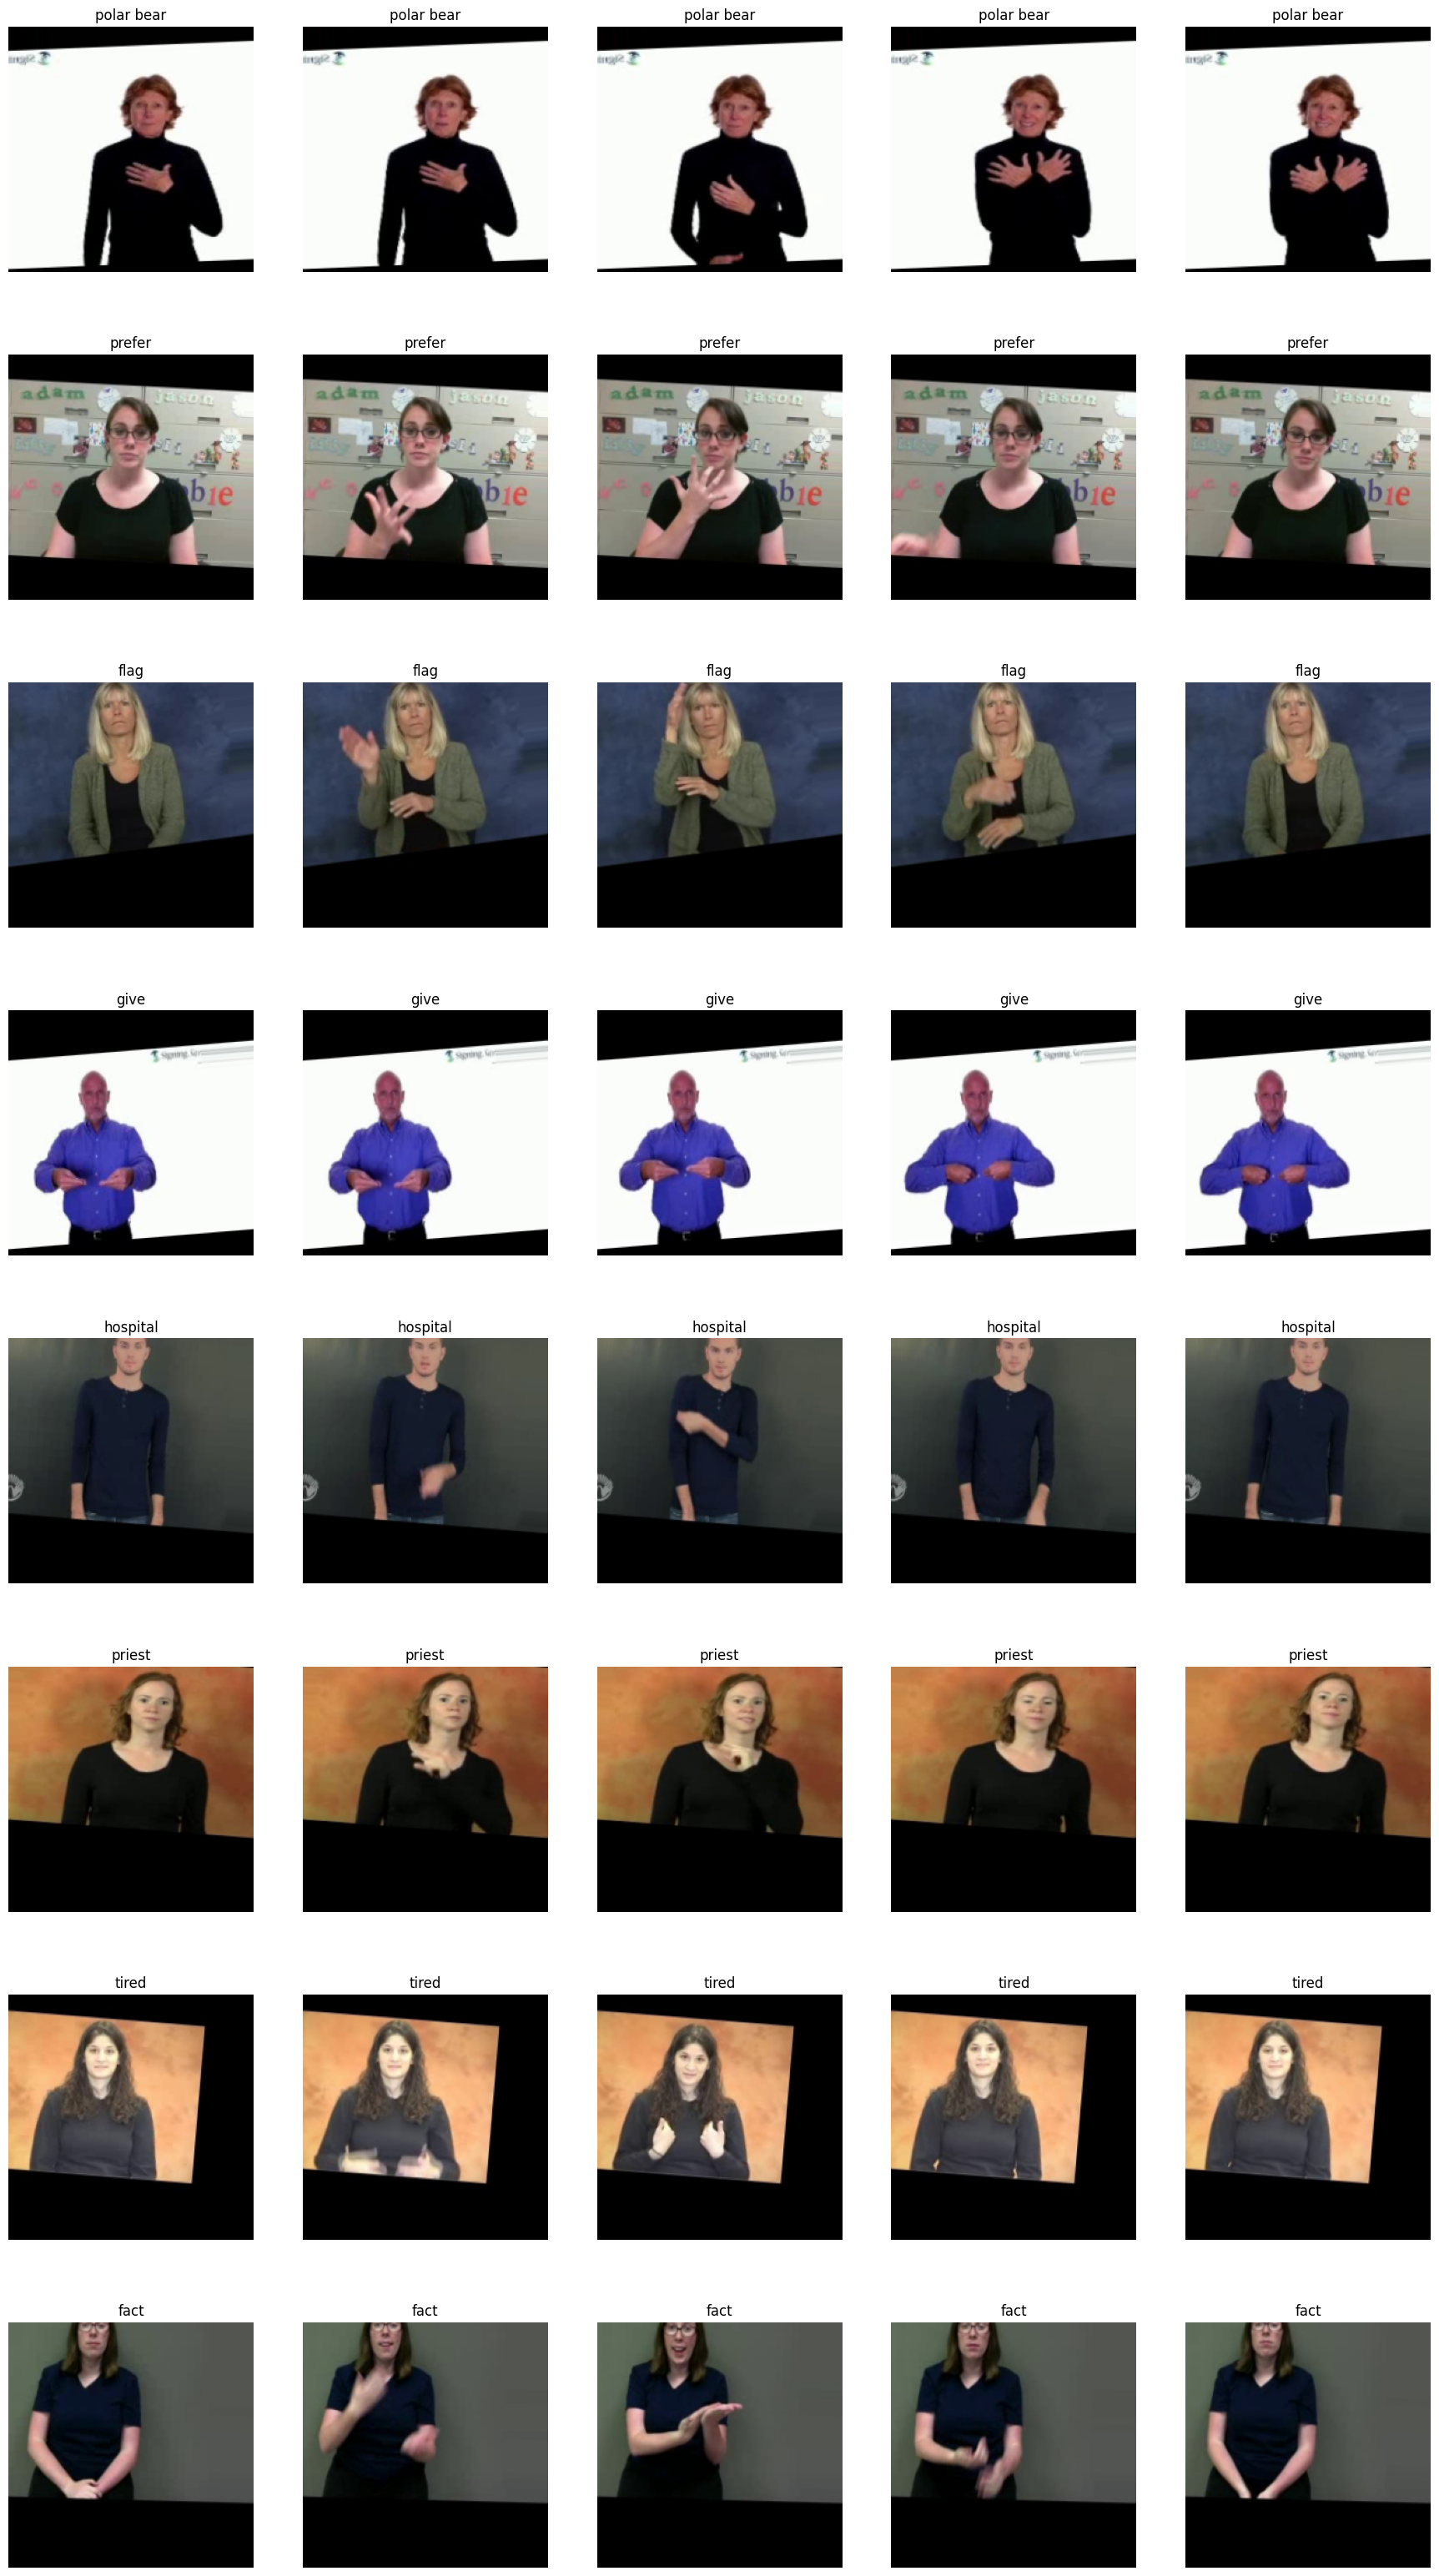

In [58]:
import keras_video.utils
keras_video.utils.show_sample(train)

In [51]:

def build_convnet(shape=(256, 256, 3)):
    momentum = .9
    model = keras.Sequential()
    model.add(Conv2D(64, (3,3), input_shape=shape,
        padding='same', activation='relu'))
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization(momentum=momentum))
    
    model.add(MaxPool2D())
    
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization(momentum=momentum))
    
    model.add(MaxPool2D())
    
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization(momentum=momentum))
    
    model.add(MaxPool2D())
    
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization(momentum=momentum))
    
    # flatten...
    model.add(GlobalMaxPool2D())
    return model

In [52]:
def build_mobilenet(shape=(224, 224, 3), nbout=1999):
    model = keras.applications.mobilenet.MobileNet(
        include_top=False,
        input_shape=shape,
        weights='imagenet')
    # Keep 9 layers to train
    trainable = 9
    for layer in model.layers[:-trainable]:
        layer.trainable = False
    for layer in model.layers[-trainable:]:
        layer.trainable = True
    output = GlobalMaxPool2D()
    return keras.Sequential([model, output])

In [53]:
from keras.layers import TimeDistributed, GRU, Dense, Dropout
def action_model(shape=(5, 256, 256, 3), nbout=1999):
    # Create our convnet with (112, 112, 3) input shape
    convnet = build_mobilenet(shape[1:])
    
    # then create our final model
    model = keras.Sequential()
    # add the convnet with (5, 112, 112, 3) shape
    model.add(TimeDistributed(convnet, input_shape=shape))
    # here, you can also use GRU or LSTM
    model.add(GRU(64))
    # and finally, we make a decision network
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(nbout, activation='softmax'))
    return model

In [54]:
INSHAPE=(NBFRAME,) + SIZE + (CHANNELS,) # (5, 224, 224, 3)
model = action_model(INSHAPE, len(classes))
optimizer = keras.optimizers.SGD()
model.compile(
    optimizer,
    'categorical_crossentropy',
    metrics=['acc']
)
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDis  (None, 5, 1024)          3228864   
 tributed)                                                       
                                                                 
 gru_3 (GRU)                 (None, 64)                209280    
                                                                 
 dense_15 (Dense)            (None, 1024)              66560     
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                      

In [ ]:
model = tf.keras.models.load_model('my_model.keras')

In [55]:
EPOCHS=40
# create a "chkp" directory before to run that
# because ModelCheckpoint will write models inside
callbacks = [
    keras.callbacks.ReduceLROnPlateau(verbose=1),
    keras.callbacks.ModelCheckpoint(
        '../Data/Videos/wlasl-complete/chkp1/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
        verbose=1),
]
history = model.fit(
    train,
    validation_data=valid,
    verbose=1,
    epochs=EPOCHS,
    callbacks=callbacks,
)

Epoch 1/40


InvalidArgumentError: Graph execution error:

Detected at node 'sequential_7/time_distributed_3/Reshape_1' defined at (most recent call last):
    File "C:\Users\christian.y\.conda\envs\ASL\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\christian.y\.conda\envs\ASL\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\christian.y\.conda\envs\ASL\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\christian.y\.conda\envs\ASL\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\christian.y\.conda\envs\ASL\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\christian.y\AppData\Local\Temp\ipykernel_18936\3680053665.py", line 10, in <module>
      history = model.fit(
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\christian.y\.conda\envs\ASL\lib\site-packages\keras\layers\rnn\time_distributed.py", line 264, in call
      y = tf.__internal__.nest.map_structure_up_to(
Node: 'sequential_7/time_distributed_3/Reshape_1'
Input to reshape is a tensor with 57344 values, but the requested shape requires a multiple of 5120
	 [[{{node sequential_7/time_distributed_3/Reshape_1}}]] [Op:__inference_train_function_472994]

In [24]:
model.save('ASL_mobile_40.keras')

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()



NameError: name 'history' is not defined